In [27]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import normalize
import tensorflow as tf

In [28]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [29]:
x_train = normalize(x_train, axis = 1)
x_test = normalize(x_test, axis=1)

In [30]:
model = Sequential()
# Input layer
model.add(Flatten(input_shape=(28,28)))
# Hidden layers
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
# Output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2618 - accuracy: 0.9232
Epoch 2/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1075 - accuracy: 0.9661
Epoch 3/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0729 - accuracy: 0.9772
Epoch 4/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0542 - accuracy: 0.9824
Epoch 5/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0407 - accuracy: 0.9868
Epoch 6/100
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0324 - accuracy: 0.9894
Epoch 7/100
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0257 - accuracy: 0.9912
Epoch 8/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0215 - accuracy: 0.9926
Epoch 9/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0181 - accuracy: 0.9938
Epoch 10/100
1875/1875 [==============================] - 7s 4ms/step - l

In [31]:
model.save('mnist-model.h5')

In [32]:
mnist_model = tf.keras.models.load_model('mnist-model.h5')

In [33]:
loss, accuracy = mnist_model.evaluate(x_test, y_test)
loss, accuracy

313/313 [==============================] - 1s 2ms/step - loss: 0.3095 - accuracy: 0.9783


(0.30952757596969604, 0.9782999753952026)

How does the model work on my paint handwritten numbers?

1/1 [==============================] - 0s 73ms/step
This digit is probably a 2


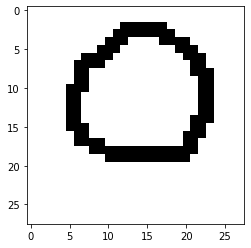

1/1 [==============================] - 0s 28ms/step
This digit is probably a 1


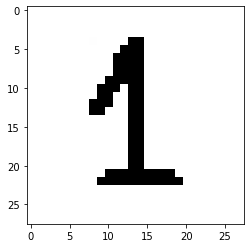

1/1 [==============================] - 0s 23ms/step
This digit is probably a 2


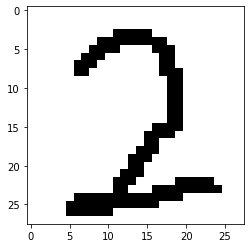

1/1 [==============================] - 0s 23ms/step
This digit is probably a 3


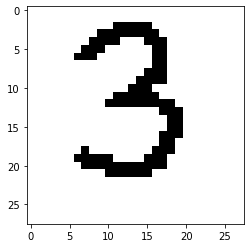

1/1 [==============================] - 0s 23ms/step
This digit is probably a 7


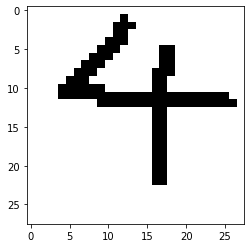

1/1 [==============================] - 0s 23ms/step
This digit is probably a 5


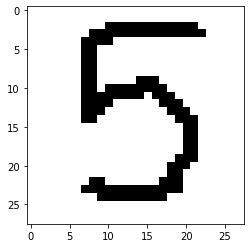

1/1 [==============================] - 0s 26ms/step
This digit is probably a 6


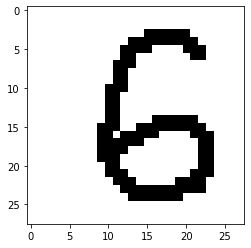

1/1 [==============================] - 0s 26ms/step
This digit is probably a 3


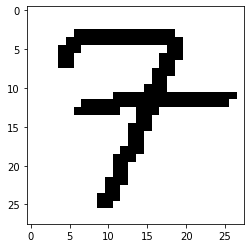

1/1 [==============================] - 0s 65ms/step
This digit is probably a 8


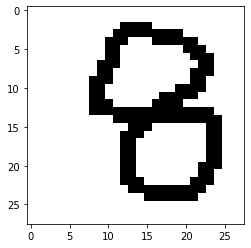

1/1 [==============================] - 0s 30ms/step
This digit is probably a 6


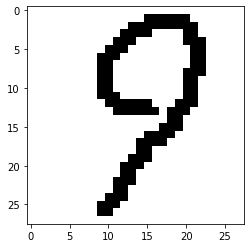

In [34]:
image_number = 0
while os.path.isfile(f"digits/digit{image_number}.png"):
    try:
        img =  cv2.imread(f"digits/digit{image_number}.png")[:,:,0]
        img = np.invert(np.array([img]))
        prediction = mnist_model.predict(img)

        print(f"This digit is probably a {np.argmax(prediction)}")
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
    except:
        print("Error!")
    finally:
        image_number += 1